#Load data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Import Libraries
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose  # to split the time series into components
import statsmodels.tsa.api as smt

warnings.filterwarnings('ignore')

In [20]:
same_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_fin_fin_data/same_final.csv')
int_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/one_hot_int.csv')

In [ ]:
same_df[4280:4290]

,Date,Open,High,Low,Close,Volume,Change,Transaction,SE_Operating_Profit,SE_Net_Profit,...,Exchange,SOX_Close,Phone,KR_Unemployment,Covid19,US_President_Republican,US_President_Democratic,KR_President_Democratic,KR_President_Conservative,KR_President_Neutral
4280,2018-04-20,10.855145,10.863987,10.847782,10.851664,12.368277,-1.263515,23.219941,30.3303,30.032854,...,-0.736883,7.147402,3.157,0.810841,False,0,1,1,0,0
4281,2018-04-23,10.839581,10.860536,10.839581,10.857074,12.356129,0.273928,23.213203,30.3303,30.032854,...,-0.721793,7.134094,3.157,0.810841,False,0,1,1,0,0
4282,2018-04-24,10.855917,10.856303,10.821377,10.828936,12.661616,-1.587117,23.490552,30.3303,30.032854,...,-0.652559,7.125846,3.157,0.810841,False,0,1,1,0,0
4283,2018-04-25,10.804055,10.829729,10.804055,10.827746,12.713769,-0.097121,23.541516,30.3303,30.032854,...,-0.618829,7.124639,3.157,0.810841,False,0,1,1,0,0
4284,2018-04-26,10.828143,10.862071,10.827746,10.861688,12.796442,1.906600,23.658130,30.3303,30.032854,...,-0.616167,7.145354,3.157,0.810841,False,0,1,1,0,0
4285,2018-04-27,10.885191,10.890032,10.867425,10.878047,13.314992,0.895015,24.193039,30.3303,30.032854,...,-0.654334,7.137358,3.157,0.810841,False,0,1,1,0,0
4286,2018-04-30,-23.025851,-23.025851,-23.025851,10.878047,11.784333,-0.030407,21.280002,30.3303,30.032854,...,-0.730669,7.126409,3.157,0.810841,False,0,1,1,0,0
4287,2018-05-02,-23.025851,-23.025851,-23.025851,10.878047,11.784333,-0.030407,21.280002,30.3303,30.032854,...,-0.658772,7.138391,3.157,0.810841,False,0,1,1,0,0
4288,2018-05-03,-23.025851,-23.025851,-23.025851,10.878047,11.784333,-0.030407,21.280002,30.3303,30.032854,...,-0.656997,7.144723,3.157,0.810841,False,0,1,1,0,0
4289,2018-05-04,10.878047,10.894886,10.855145,10.857074,17.304293,-1.194880,28.350538,30.3303,30.032854,...,-0.649008,7.167578,3.157,0.810841,False,0,1,1,0,0


In [ ]:
same_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5865 non-null   object 
 1   Open                       5865 non-null   float64
 2   High                       5865 non-null   float64
 3   Low                        5865 non-null   float64
 4   Close                      5865 non-null   float64
 5   Volume                     5865 non-null   float64
 6   Change                     5865 non-null   float64
 7   Transaction                5865 non-null   float64
 8   SE_Operating_Profit        5865 non-null   float64
 9   SE_Net_Profit              5865 non-null   float64
 10  SE_Total_Equity            5865 non-null   float64
 11  SE_Total_Liabilities       5865 non-null   float64
 12  SE_Revenue                 5865 non-null   float64
 13  SE_Foreign                 5865 non-null   float

In [ ]:
int_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5865 entries, 0 to 5864
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       5865 non-null   object 
 1   Open                       5865 non-null   float64
 2   High                       5865 non-null   float64
 3   Low                        5865 non-null   float64
 4   Close                      5865 non-null   float64
 5   Volume                     5865 non-null   float64
 6   Change                     5865 non-null   float64
 7   Transaction                5865 non-null   float64
 8   SE_Operating_Profit        5865 non-null   float64
 9   SE_Net_Profit              5865 non-null   float64
 10  SE_Total_Equity            5865 non-null   float64
 11  SE_Total_Liabilities       5865 non-null   float64
 12  SE_Revenue                 5865 non-null   float64
 13  SE_Foreign                 5865 non-null   float

In [21]:
same_df['Date']= pd.to_datetime(same_df['Date'])
int_df['Date']= pd.to_datetime(int_df['Date'])
same_df = same_df.set_index('Date')
int_df = int_df.set_index('Date')

## Visualizations

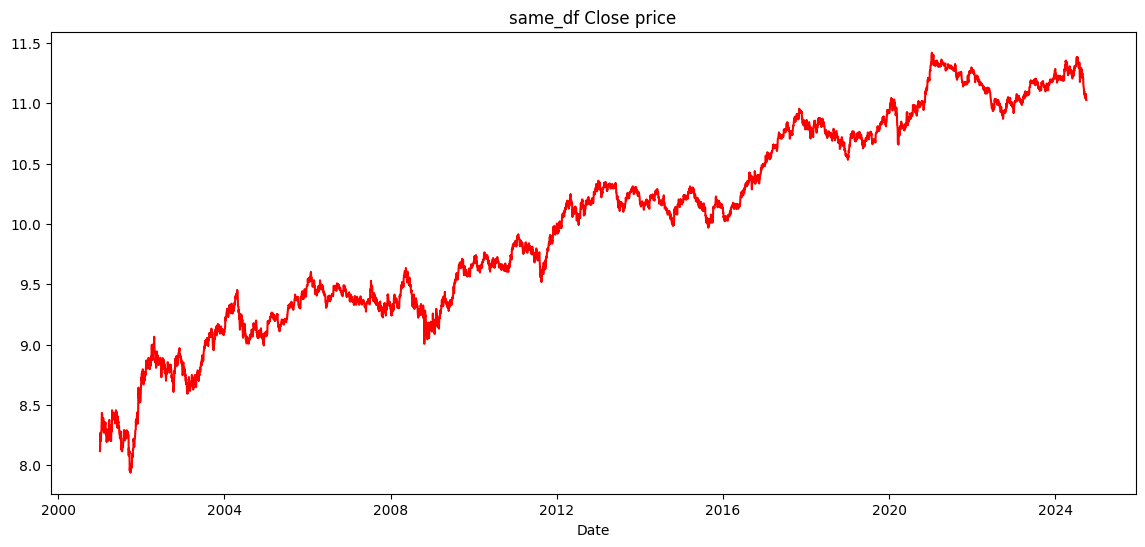

In [ ]:
plt.figure(figsize=(14, 6))
plt.title("same_df Close price")
plt.plot(same_df['Close'], label='Close Price', color='red')
plt.xlabel('Date')
plt.show()

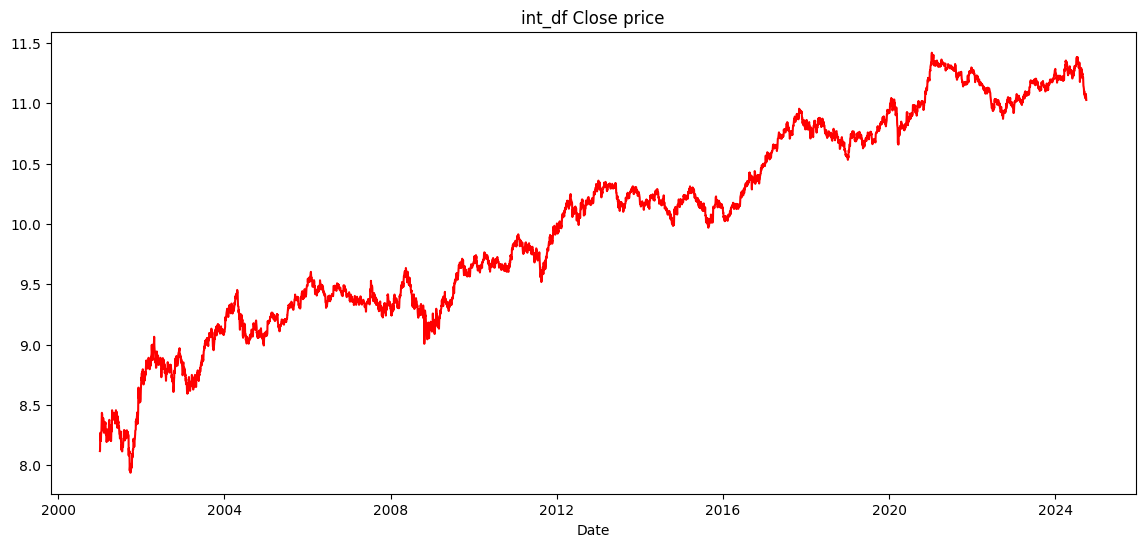

In [ ]:
plt.figure(figsize=(14, 6))
plt.title("int_df Close price")
plt.plot(int_df['Close'], label='Close Price', color='red')
plt.xlabel('Date')
plt.show()

##ADF Checks

In [ ]:
def adf_test(series):
    result = sm.tsa.adfuller(series)
    print(f'ADF Statistic: {result[0]:.2f}')
    print(f'p-value: {result[1]:.2f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.2f}')

In [ ]:
for col in same_df.columns:
  print(f"\nADF Test for {col}")
  print("===========================")
  adf_test(same_df[col])


ADF Test for Open
ADF Statistic: -3.43
p-value: 0.01
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for High
ADF Statistic: -3.43
p-value: 0.01
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for Low
ADF Statistic: -3.42
p-value: 0.01
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for Close
ADF Statistic: -1.70
p-value: 0.43
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for Volume
ADF Statistic: -1.00
p-value: 0.75
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for Change
ADF Statistic: -36.68
p-value: 0.00
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for Transaction
ADF Statistic: -0.52
p-value: 0.89
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for SE_Operating_Profit
ADF Statistic: -4.33
p-value: 0.00
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for SE_Net_Profit
ADF Statistic: -4.90
p-value: 0.00
Critical Values:
   1%

Stationary variables: Open, High, Low, Change, SE_Operating_Profit, SE_Net_Profit, SE_Total_Liabilities (1%), SE_Revenue, KR_Inflation (1%), US_GDP_Annual (1%), KR_GDP_Annual (1%), US_Economic_Growth_Rate, KR_Economic_Growth_Rate, WTI (1%), KR_Unemployment, KR_President_Neutral

Non stationary: Close, Volume, Transaction, SE_Total_Equity, SE_Foreign, US_Inflation, CN_Inflation, CN_GDP_Annual, US_Base, US_10, KR_Base, KR_10, Exchange, SOX_Close, Phone, Covid19, US_President_Republican, US_President_Democratic, KR_President_Democratic, KR_President_Conservative

In [ ]:
# Apply differencing to non stationary variables
non_stationary = ['Close', 'Volume', 'Transaction', 'SE_Total_Equity', 'SE_Foreign', 'US_Inflation', 'CN_Inflation', 'CN_GDP_Annual',
                  'US_Base', 'US_10', 'KR_Base', 'KR_10', 'Exchange', 'SOX_Close', 'Phone']

In [ ]:
#same dataset
diff_same_df = pd.DataFrame()
for col in same_df.columns:
  if col in non_stationary:
    col_shift = same_df[col].shift(1)
    diff_same_df [col] = same_df[col] - col_shift
    diff_same_df.dropna(inplace = True)
    diff_same_df = diff_same_df.reindex(diff_same_df.index, method='ffill')
  else:
    diff_same_df[col] = same_df[col]

diff_same_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5864 entries, 2001-01-03 to 2024-09-30
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5864 non-null   float64
 1   High                       5864 non-null   float64
 2   Low                        5864 non-null   float64
 3   Close                      5864 non-null   float64
 4   Volume                     5864 non-null   float64
 5   Change                     5864 non-null   float64
 6   Transaction                5864 non-null   float64
 7   SE_Operating_Profit        5864 non-null   float64
 8   SE_Net_Profit              5864 non-null   float64
 9   SE_Total_Equity            5864 non-null   float64
 10  SE_Total_Liabilities       5864 non-null   float64
 11  SE_Revenue                 5864 non-null   float64
 12  SE_Foreign                 5864 non-null   float64
 13  US_Inflation               586

In [ ]:
#ADF Rechecks
for col in diff_same_df.columns:
  print("===========================")
  print(f"\nADF Test for {col}")
  adf_test(diff_same_df[col])

In [ ]:
for col in int_df.columns:
  print(f"\nADF Test for {col}")
  print("===========================")
  adf_test(int_df[col])


ADF Test for Open
ADF Statistic: -3.43
p-value: 0.01
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for High
ADF Statistic: -3.43
p-value: 0.01
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for Low
ADF Statistic: -3.42
p-value: 0.01
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for Close
ADF Statistic: -1.70
p-value: 0.43
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for Volume
ADF Statistic: -1.00
p-value: 0.75
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for Change
ADF Statistic: -36.68
p-value: 0.00
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for Transaction
ADF Statistic: -0.52
p-value: 0.89
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for SE_Operating_Profit
ADF Statistic: -5.97
p-value: 0.00
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57

ADF Test for SE_Net_Profit
ADF Statistic: -5.13
p-value: 0.00
Critical Values:
   1%

Stationary variables: Open, High, Low, Change, SE_Operating_Profit, SE_Net_Profit, SE_Total_Liabilities, SE_Revenue, US_GDP_Annual, CN_Inflation (1%) KR_GDP_Annual,CN_GDP_Annual (1%), US_Economic_Growth_Rate, KR_Economic_Growth_Rate, WTI (1%), KR_Unemployment, KR_President_Neutral

Non stationary: Close, Volume, Transaction, SE_Total_Equity, SE_Foreign, US_Inflation, KR_Inflation, US_Base, US_10, KR_Base, KR_10, Exchange, SOX_Close, Phone, Covid19. US_President_Republican, US_President_Democratic, KR_President_Democratic, KR_President_Conservative

In [ ]:
#interpolated differenced dataset ADF check

diff_int_df = pd.DataFrame()
for col in int_df.columns:
  if col in non_stationary:
    col_shift = int_df[col].shift(1)
    diff_int_df [col] = int_df[col] - col_shift
    diff_int_df.dropna(inplace = True)
    diff_int_df = diff_int_df.reindex(diff_int_df.index, method='ffill')
  else:
    diff_int_df[col] = int_df[col]

diff_int_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5864 entries, 2001-01-03 to 2024-09-30
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5864 non-null   float64
 1   High                       5864 non-null   float64
 2   Low                        5864 non-null   float64
 3   Close                      5864 non-null   float64
 4   Volume                     5864 non-null   float64
 5   Change                     5864 non-null   float64
 6   Transaction                5864 non-null   float64
 7   SE_Operating_Profit        5864 non-null   float64
 8   SE_Net_Profit              5864 non-null   float64
 9   SE_Total_Equity            5864 non-null   float64
 10  SE_Total_Liabilities       5864 non-null   float64
 11  SE_Revenue                 5864 non-null   float64
 12  SE_Foreign                 5864 non-null   float64
 13  US_Inflation               586

In [ ]:
#ADF Rechceks
for col in diff_int_df.columns:
    print("===========================")
    print(f"\nADF Test for {col}")
    adf_test(diff_int_df[col])

##Exogeneity Tests

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

def granger_test (feature):
  # Test if feature Granger-causes close price
  print(f"\nGranger Causality Test: {feature} -> Close")
  granger_test_1a = grangercausalitytests(diff_int_df[['Close', f'{feature}']], maxlag=10)
  print("=====================================================================================")

  # Test if close price Granger-causes feature
  print(f"\nGranger Causality Test: Close -> {feature}")
  granger_test_1b = grangercausalitytests(diff_int_df[[f'{feature}', 'Close']], maxlag=10)
  print("=====================================================================================")
  print("=====================================================================================")

In [ ]:
#diff_same_df.set_index('Date', inplace = True)
first_half_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'Transaction',
                      'SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
                      'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation',
                      'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual',
                      'KR_GDP_Annual','CN_GDP_Annual']
sec_half_columns = ['US_Economic_Growth_Rate','KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10',
       'WTI', 'Exchange', 'SOX_Close', 'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic',
       'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral']
for col in sec_half_columns:
  granger_test(col)


Granger Causality Test: US_Economic_Growth_Rate -> Close

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3353  , p=0.0374  , df_denom=5860, df_num=1
ssr based chi2 test:   chi2=4.3375  , p=0.0373  , df=1
likelihood ratio test: chi2=4.3359  , p=0.0373  , df=1
parameter F test:         F=4.3353  , p=0.0374  , df_denom=5860, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1983  , p=0.0409  , df_denom=5857, df_num=2
ssr based chi2 test:   chi2=6.4020  , p=0.0407  , df=2
likelihood ratio test: chi2=6.3985  , p=0.0408  , df=2
parameter F test:         F=3.1983  , p=0.0409  , df_denom=5857, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5689  , p=0.0526  , df_denom=5854, df_num=3
ssr based chi2 test:   chi2=7.7160  , p=0.0523  , df=3
likelihood ratio test: chi2=7.7109  , p=0.0524  , df=3
parameter F test:         F=2.5689  , p=0.0526  , df_denom=5854, df_num=3

Granger Causality
number of l

# Exponential Smoothing

In [3]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [4]:
same_df.info()

NameError: name 'same_df' is not defined

In [22]:
train = same_df['Close'][:4692]
print("Length of train", len(train))

Length of train 4692


In [23]:
print(train.info())

<class 'pandas.core.series.Series'>
DatetimeIndex: 4692 entries, 2001-01-02 to 2019-12-30
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
4692 non-null   float64
dtypes: float64(1)
memory usage: 73.3 KB
None


In [24]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.5)

In [62]:
train = train.reset_index(drop=True)
same_df = same_df.reset_index(drop=True)
test = same_df['Close'][4693:]

In [26]:
test

,Close
4693,10.924138
4694,10.924138
4695,10.929529
4696,10.947292
4697,10.978490
...,...
5857,11.054060
5858,11.038110
5859,11.077516
5860,11.069758


In [63]:
y_pred = ses_model.forecast(1169)
print(y_pred.info())

<class 'pandas.core.series.Series'>
RangeIndex: 1169 entries, 4692 to 5860
Series name: None
Non-Null Count  Dtype  
--------------  -----  
1169 non-null   float64
dtypes: float64(1)
memory usage: 9.3 KB
None


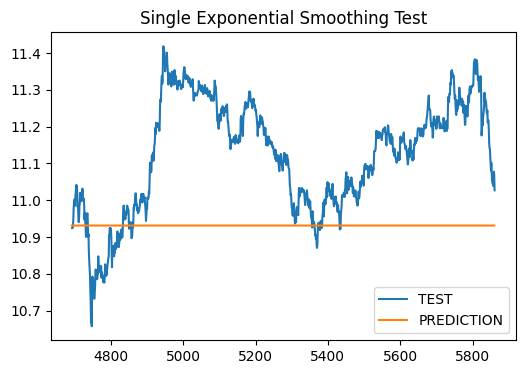

In [65]:
def plot_co2(test, y_pred, title):
    mae = mean_absolute_error(test, y_pred)
    #train.plot(legend=True, label="TRAIN", title=f"{title}, MAE: {round(mae,2)}")
    test.plot(legend=True, label="TEST", figsize=(6, 4), title=f"{title}")
    y_pred.plot(legend=True, label="PREDICTION")
    plt.show()

plot_co2(test, y_pred, "Single Exponential Smoothing Test")

In [64]:
evaluate_model(test, y_pred)

MAE: 0.20904596495892397
MSE: 0.059402044567723036
RMSE: 0.24372534658447617
R2: -1.629972560809517


{'MAE': 0.20904596495892397,
 'MSE': 0.059402044567723036,
 'RMSE': 0.24372534658447617,
 'R2': -1.629972560809517}

In [40]:
train = same_df['Close'][:4692]

ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.5)

train = train.reset_index(drop=True)
same_df = same_df.reset_index(drop=True)
test = same_df['Close'][4693:]

y_pred = ses_model.forecast(1169)

plot_co2(train, test, y_pred, "Single Exponential Smoothing -- one_hot_int")

TypeError: plot_co2() takes 3 positional arguments but 4 were given

In [41]:
def ses_optimizer(train, alphas, step=1169):  # step for length of test set

    best_alpha, best_mae = None, float("inf")

    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)

        if mae < best_mae:
            best_alpha, best_mae = alpha, mae

        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae

alphas = np.arange(0.8, 1, 0.01)

In [42]:
best_alpha, best_mae = ses_optimizer(train, alphas) # save the results(return of func.)

alpha: 0.8 mae: 0.209
alpha: 0.81 mae: 0.2091
alpha: 0.82 mae: 0.2091
alpha: 0.83 mae: 0.2092
alpha: 0.84 mae: 0.2092
alpha: 0.85 mae: 0.2092
alpha: 0.86 mae: 0.2093
alpha: 0.87 mae: 0.2094
alpha: 0.88 mae: 0.2094
alpha: 0.89 mae: 0.2095
alpha: 0.9 mae: 0.2095
alpha: 0.91 mae: 0.2096
alpha: 0.92 mae: 0.2097
alpha: 0.93 mae: 0.2097
alpha: 0.94 mae: 0.2098
alpha: 0.95 mae: 0.2099
alpha: 0.96 mae: 0.21
alpha: 0.97 mae: 0.2101
alpha: 0.98 mae: 0.2102
alpha: 0.99 mae: 0.2102
best_alpha: 0.8 best_mae: 0.209


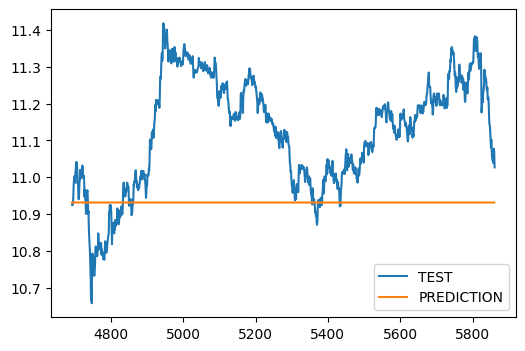

In [44]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(1169)
# In fact, the error we will find here is also found in the above function.
# We're posting here for awareness.

plot_co2(test, y_pred, "Single Exponential Smoothing Test")

In [ ]:
evaluate_model(test, y_pred)

##DES

In [45]:
def des_optimizer(train, alphas, betas, step=1169):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae


In [66]:
alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas)

alpha: 0.01 beta: 0.01 mae: 0.242
alpha: 0.01 beta: 0.11 mae: 2.6521
alpha: 0.01 beta: 0.21 mae: 0.5655
alpha: 0.01 beta: 0.31 mae: 0.1592
alpha: 0.01 beta: 0.41 mae: 2.1182
alpha: 0.01 beta: 0.51 mae: 3.7761
alpha: 0.01 beta: 0.61 mae: 5.7589
alpha: 0.01 beta: 0.71 mae: 2.2522
alpha: 0.01 beta: 0.81 mae: 1.0668
alpha: 0.01 beta: 0.91 mae: 4.6716
alpha: 0.11 beta: 0.01 mae: 0.6189
alpha: 0.11 beta: 0.11 mae: 2.5263
alpha: 0.11 beta: 0.21 mae: 4.9993
alpha: 0.11 beta: 0.31 mae: 6.4125
alpha: 0.11 beta: 0.41 mae: 5.4535
alpha: 0.11 beta: 0.51 mae: 3.2911
alpha: 0.11 beta: 0.61 mae: 0.5581
alpha: 0.11 beta: 0.71 mae: 2.666
alpha: 0.11 beta: 0.81 mae: 6.0101
alpha: 0.11 beta: 0.91 mae: 8.5025
alpha: 0.21 beta: 0.01 mae: 0.6833
alpha: 0.21 beta: 0.11 mae: 2.9588
alpha: 0.21 beta: 0.21 mae: 3.3842
alpha: 0.21 beta: 0.31 mae: 1.3153
alpha: 0.21 beta: 0.41 mae: 1.6198
alpha: 0.21 beta: 0.51 mae: 4.0956
alpha: 0.21 beta: 0.61 mae: 5.5931
alpha: 0.21 beta: 0.71 mae: 6.154
alpha: 0.21 beta: 0.81 

In [47]:
final_des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha,smoothing_slope=best_beta)

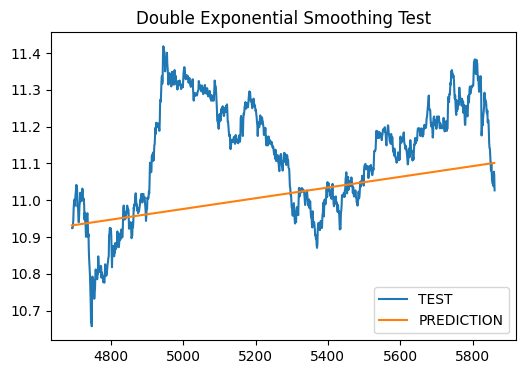

In [67]:
y_pred = final_des_model.forecast(1169)

plot_co2(test, y_pred, "Double Exponential Smoothing Test")

In [69]:
evaluate_model(test, y_pred)

MAE: 0.14068890880679594
MSE: 0.030943302780746036
RMSE: 0.17590708564678695
R2: -0.36998714179615844


{'MAE': 0.14068890880679594,
 'MSE': 0.030943302780746036,
 'RMSE': 0.17590708564678695,
 'R2': -0.36998714179615844}

##TES

In [51]:
tes_model = ExponentialSmoothing(train,
                                 trend="add",
                                 seasonal="add",
                                 seasonal_periods=365).fit(smoothing_level=0.5,
                                                          smoothing_slope=0.5,
                                                          smoothing_seasonal=0.5)

In [52]:
# prediction and plot
y_pred = tes_model.forecast(1169)
plot_co2(train, test, y_pred, "Triple Exponential Smoothing")

TypeError: plot_co2() takes 3 positional arguments but 4 were given

In [53]:
alphas = betas = gammas = np.arange(0.20, 1, 0.10)
abg = list(itertools.product(alphas, betas, gammas))
abg[0:20] # observe abg that includes all combinations

[(0.2, 0.2, 0.2),
 (0.2, 0.2, 0.30000000000000004),
 (0.2, 0.2, 0.4000000000000001),
 (0.2, 0.2, 0.5000000000000001),
 (0.2, 0.2, 0.6000000000000001),
 (0.2, 0.2, 0.7000000000000002),
 (0.2, 0.2, 0.8000000000000003),
 (0.2, 0.2, 0.9000000000000001),
 (0.2, 0.30000000000000004, 0.2),
 (0.2, 0.30000000000000004, 0.30000000000000004),
 (0.2, 0.30000000000000004, 0.4000000000000001),
 (0.2, 0.30000000000000004, 0.5000000000000001),
 (0.2, 0.30000000000000004, 0.6000000000000001),
 (0.2, 0.30000000000000004, 0.7000000000000002),
 (0.2, 0.30000000000000004, 0.8000000000000003),
 (0.2, 0.30000000000000004, 0.9000000000000001),
 (0.2, 0.4000000000000001, 0.2),
 (0.2, 0.4000000000000001, 0.30000000000000004),
 (0.2, 0.4000000000000001, 0.4000000000000001),
 (0.2, 0.4000000000000001, 0.5000000000000001)]

In [54]:
def tes_optimizer(train, abg, step=1169):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=365).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])

        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

In [55]:
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg)

best_alpha: 0.4 best_beta: 0.3 best_gamma: 0.4 best_mae: 0.1305


In [56]:
print(best_alpha, best_beta, best_gamma, best_mae)

0.4000000000000001 0.30000000000000004 0.4000000000000001 0.1304886060238435


In [57]:
final_tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=365).\
            fit(smoothing_level=best_alpha, smoothing_trend=best_beta, smoothing_seasonal=best_gamma)

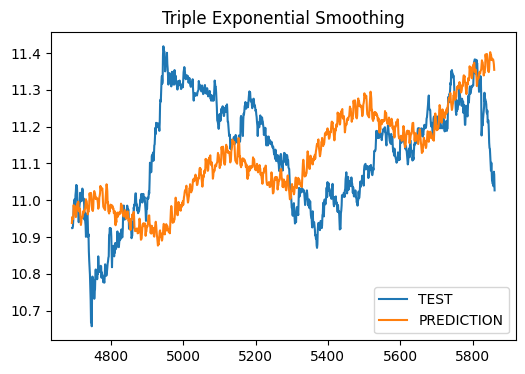

In [70]:
# prediction and plot
y_pred = final_tes_model.forecast(1169)
plot_co2(test, y_pred, "Triple Exponential Smoothing")

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(actual, predicted):
  """
  Calculates MAE, MSE, R2, and RMSE for a given set of actual and predicted values.

  Args:
    actual: A numpy array of actual values.
    predicted: A numpy array of predicted values.

  Returns:
    A dictionary containing the calculated metrics.
  """

  mae = mean_absolute_error(actual, predicted)
  mse = mean_squared_error(actual, predicted)
  rmse = np.sqrt(mse)
  r2 = r2_score(actual, predicted)
  print('MAE:', mae)
  print('MSE:', mse)
  print('RMSE:', rmse)
  print('R2:', r2)

  return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [61]:
evaluate_model(test, y_pred)

MAE: 0.1304886060238435
MSE: 0.028125811207485918
RMSE: 0.1677075168484881
R2: -0.24524521444484915


{'MAE': 0.1304886060238435,
 'MSE': 0.028125811207485918,
 'RMSE': 0.1677075168484881,
 'R2': -0.24524521444484915}

# ARIMA(X)

In [ ]:
'''
lag_dict = {
    "Change": 1,
    "US_10": 1,
    "KR_10": 1,
    "Exchange": 1,
    "WTI": 2,
    "SOX_Close": 2,
    "KR_Unemployment": 1,
}

lagged_exog_train = train_same_df.copy()
for col, lag in lag_dict.items():
    if lag > 0:
        lagged_exog_train[f"{col}_lag{lag}"] = train_same_df[col].shift(lag)

lagged_exog_test = test_same_df.copy()
for col, lag in lag_dict.items():
    if lag > 0:
        lagged_exog_test[f"{col}_lag{lag}"] = test_same_df[col].shift(lag)

train_same_exog = lagged_exog_train[['Change', 'US_10', 'KR_10', 'WTI', 'Exchange', 'SOX_Close', 'KR_Unemployment']]
test_same_exog = lagged_exog_test[['Change', 'US_10', 'KR_10', 'WTI', 'Exchange', 'SOX_Close', 'KR_Unemployment']]
'''

In [ ]:
train_same_df = diff_same_df['Close'].iloc[:4692]
test_same_df = diff_same_df['Close'].iloc[4692:]

same_exog = diff_same_df[['SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Liabilities','SE_Revenue', 'US_GDP_Annual', 'US_Base' ,'US_10', 'KR_Unemployment']]
train_same_exog = same_exog.iloc[:4692]
test_same_exog = same_exog.iloc[4692:]

Exogeneous variables:
SE_Operating_Profit (lag 3),
SE_Net_Profit (lag 2),
SE_Total_Liabilities (lag 2),
SE_Revenue (lag 6),
US_GDP_Annual (lag 3),
US_Base,
US_10,
KR_Unemployment

Endogeneos variables:
Change (endogeneous from lag 2),
KR_GDP_Annual (lag 7; up to lag 4),
KR_10 (lag 3; lag 2 onwards),
WTI (lag 2; lag 2),
Exchange (lag 6; lag 3),
SOX_Close (all; lag 5)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the p, d, and q parameters
p = range(0, 3)
d = range(0, 3)
q = range(0, 3)

# Generate combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

# DataFrame to store results
results = []

# Grid search over ARIMAX parameters
for param in pdq:
    try:
        # Fit ARIMAX model with exogenous variable(s) (e.g., exog=train_exog)
        temp_model = ARIMA(train_same_df, order=param, exog=train_same_exog)
        temp_result = temp_model.fit()
        print(f"ARIMA({param[0]}, {param[1]}, {param[2]}) - AIC: {temp_result.aic}")

        # Store parameters and AIC
        results.append([param, temp_result.aic])
    except Exception as e:
        continue

# Convert results to DataFrame and sort by AIC
results_df = pd.DataFrame(results, columns=['parameters', 'AIC'])
results_df = results_df.sort_values(by='AIC').reset_index(drop=True)

print("Optimal ARIMAX parameters and AIC values:")
print(results_df)

ARIMA(0, 0, 0) - AIC: -23057.89888049251
ARIMA(0, 0, 1) - AIC: -23062.24305176573
ARIMA(0, 0, 2) - AIC: -23092.796209794393
ARIMA(0, 1, 0) - AIC: -19991.266275996495
ARIMA(0, 1, 1) - AIC: -22794.351100464562
ARIMA(0, 1, 2) - AIC: -22863.832774053255
ARIMA(0, 2, 0) - AIC: -15049.880600515426
ARIMA(0, 2, 1) - AIC: -19975.489614231512
ARIMA(0, 2, 2) - AIC: -22942.207592350387
ARIMA(1, 0, 0) - AIC: -23061.651056243958
ARIMA(1, 0, 1) - AIC: -23053.599989714054
ARIMA(1, 0, 2) - AIC: -23112.297800656197
ARIMA(1, 1, 0) - AIC: -20985.998344027696
ARIMA(1, 1, 1) - AIC: -22831.689308180452
ARIMA(1, 1, 2) - AIC: -22894.359934669148
ARIMA(1, 2, 0) - AIC: -17370.223236198213
ARIMA(1, 2, 1) - AIC: -20686.64852446983
ARIMA(1, 2, 2) - AIC: -20129.173975860365
ARIMA(2, 0, 0) - AIC: -23093.63389125683
ARIMA(2, 0, 1) - AIC: -23113.024150720754
ARIMA(2, 0, 2) - AIC: -23110.78181986564
ARIMA(2, 1, 0) - AIC: -21522.4263663749
ARIMA(2, 1, 1) - AIC: -22645.845385304372
ARIMA(2, 1, 2) - AIC: -22886.61172506139


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Define and fit the ARIMAX model
arimax_model = ARIMA(train_same_df, order=(2, 0, 1), exog=train_same_exog)
arimax_fit = arimax_model.fit()
print(arimax_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4692
Model:                 ARIMA(2, 0, 1)   Log Likelihood               11569.512
Date:                Mon, 16 Dec 2024   AIC                         -23113.024
Time:                        01:11:17   BIC                         -23029.127
Sample:                             0   HQIC                        -23083.525
                               - 4692                                         
Covariance Type:                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0238      0.030      0.792      0.428      -0.035       0.083
SE_Operating_Profit     -0.0003      0.001     -0.315      0.753      -0.002       0.002
SE_Net_Profi

In [ ]:
# Forecasting with ARIMAX
forecast_steps = len(test_same_df)
arimax_forecast = arimax_fit.get_forecast(steps=forecast_steps, exog=test_same_exog)
arimax_forecast_mean = arimax_forecast.predicted_mean
arimax_conf_int = arimax_forecast.conf_int()

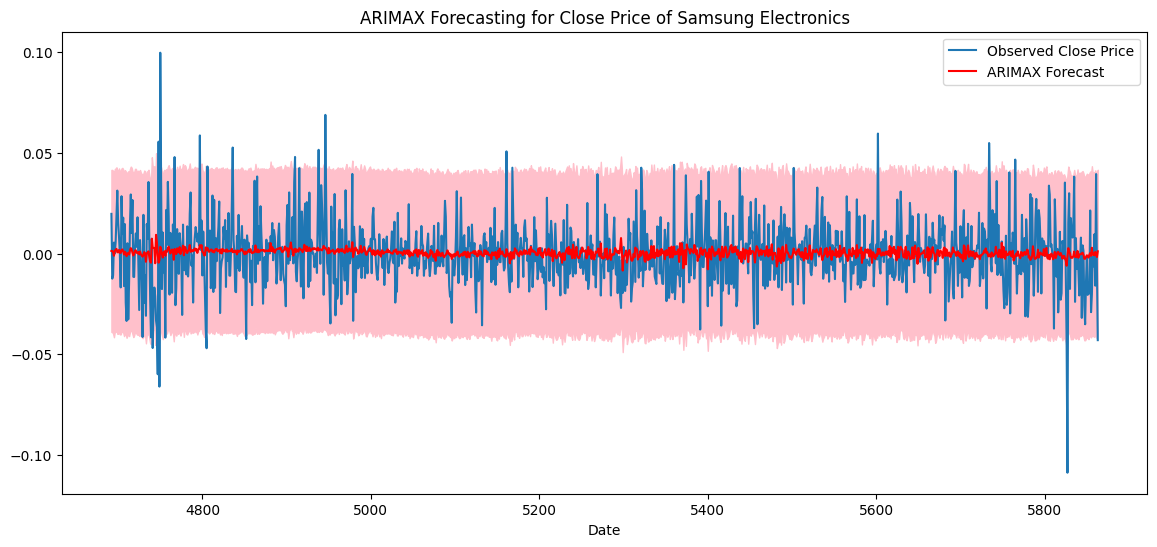

In [ ]:
# Plot ARIMAX forecast
diff_same_df = diff_same_df.reset_index(drop=True)
plt.figure(figsize=(14, 6))
plt.plot(diff_same_df['Close'].iloc[4692:], label='Observed Close Price')
plt.plot(arimax_forecast_mean, color='red', label='ARIMAX Forecast')
plt.fill_between(arimax_conf_int.index,
                 arimax_conf_int.iloc[:, 0],
                 arimax_conf_int.iloc[:, 1], color='pink')
plt.legend()
plt.title('ARIMAX Forecasting for Close Price of Samsung Electronics')
plt.xlabel('Date')
plt.show()

RMSE: 0.016389800932401274
AUC-ROC: 0.5353290822069603


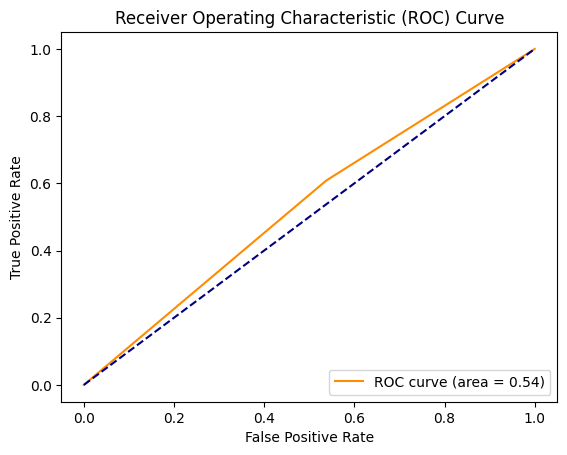

PR AUC: 0.6455392927473029


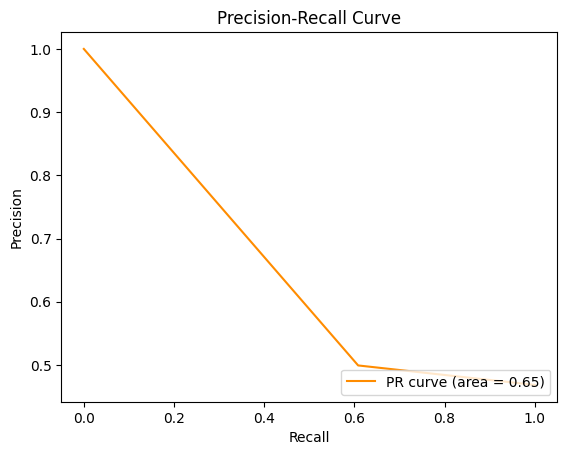

In [ ]:
from sklearn.metrics import roc_curve, auc, mean_squared_error
from sklearn.metrics import precision_recall_curve

forecast_steps = len(test_same_df)
arimax_forecast = arimax_fit.get_forecast(steps=forecast_steps, exog=test_same_exog)
arimax_forecast_mean = arimax_forecast.predicted_mean
arimax_conf_int = arimax_forecast.conf_int()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_same_df, arimax_forecast_mean))
print('RMSE:', rmse)

threshold = test_same_df.mean()

# Convert to binary based on the threshold
binary_test_same_df = (test_same_df > threshold).astype(int)
binary_arimax_forecast_mean = (arimax_forecast_mean > threshold).astype(int)

# Calculate ROC curve and AUC-ROC
fpr, tpr, thresholds = roc_curve(binary_test_same_df, binary_arimax_forecast_mean)
roc_auc = auc(fpr, tpr)
print('AUC-ROC:', roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate PR curve
precision, recall, _ = precision_recall_curve(binary_test_same_df, binary_arimax_forecast_mean)
pr_auc = auc(recall, precision)
print('PR AUC:', pr_auc)

# Plot the PR curve
plt.plot(recall, precision, color='darkorange', label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

Interpolated data

Exogeneous variables:
CN_Inflation (lag 3),
US_Economic_Growth_Rate,
KR_Economic_Growth_Rate,
US_10,
KR_Unemployment

Endogeneos variables:
Change (all; lag2 onwards),
SE_Total_Equity (all; lag 5 onwards),
SE_Total Revenue (lag 5 above; lag 6 above),
KR_GDP_Annual,
US_Base (all; lag 7 -8),
KR_Base (lag 3; all),
KR_10 (lag 3 above; lag 2-4),
WTI (all; lag 2),
Exchange (lag 6; lag 3 above),
SOX_Close (all; lag 5, 7)

In [ ]:
train_int_df = diff_int_df['Close'].iloc[:4692]
test_int_df = diff_int_df['Close'].iloc[4692:]

int_exog = diff_int_df[['CN_Inflation', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_10', 'KR_Unemployment']]
train_int_exog = int_exog.iloc[:4692]
test_int_exog = int_exog.iloc[4692:]

In [ ]:
train_int_df = train_int_df.reset_index(drop=True)
train_int_exog = train_int_exog.reset_index(drop=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the p, d, and q parameters
p = range(0, 3)
d = range(0, 3)
q = range(0, 3)

# Generate combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

# DataFrame to store results
results = []

# Grid search over ARIMAX parameters
for param in pdq:
    try:
        # Fit ARIMAX model with exogenous variable(s) (e.g., exog=train_exog)
        temp_model = ARIMA(train_int_df, order=param, exog=train_int_exog)
        temp_result = temp_model.fit()
        print(f"ARIMA({param[0]}, {param[1]}, {param[2]}) - AIC: {temp_result.aic}")

        # Store parameters and AIC
        results.append([param, temp_result.aic])
    except Exception as e:
        continue

# Convert results to DataFrame and sort by AIC
results_df = pd.DataFrame(results, columns=['parameters', 'AIC'])
results_df = results_df.sort_values(by='AIC').reset_index(drop=True)

print("Optimal ARIMAX parameters and AIC values:")
print(results_df)

ARIMA(0, 0, 0) - AIC: -23034.741556193487
ARIMA(0, 0, 1) - AIC: -23043.18739545504
ARIMA(0, 0, 2) - AIC: -23070.83286235416
ARIMA(0, 1, 0) - AIC: -19993.693627586275
ARIMA(0, 1, 1) - AIC: -23020.283547085703
ARIMA(0, 1, 2) - AIC: -23022.00643259009
ARIMA(0, 2, 0) - AIC: -15049.440105928956
ARIMA(0, 2, 1) - AIC: -19977.967366961642
ARIMA(0, 2, 2) - AIC: -22887.41096572366
ARIMA(1, 0, 0) - AIC: -23041.90180901979
ARIMA(1, 0, 1) - AIC: -23037.695191382638
ARIMA(1, 0, 2) - AIC: -23089.27196811544
ARIMA(1, 1, 0) - AIC: -20980.5044714558
ARIMA(1, 1, 1) - AIC: -23013.470289765653
ARIMA(1, 1, 2) - AIC: -23017.340172763354
ARIMA(1, 2, 0) - AIC: -17366.654267119407
ARIMA(1, 2, 1) - AIC: -20893.104987137398
ARIMA(1, 2, 2) - AIC: -20823.661547691307
ARIMA(2, 0, 0) - AIC: -23072.72591544474
ARIMA(2, 0, 1) - AIC: -23089.789767820002
ARIMA(2, 0, 2) - AIC: -23087.684557573783
ARIMA(2, 1, 0) - AIC: -21513.723597585704
ARIMA(2, 1, 1) - AIC: -23005.520924324836
ARIMA(2, 1, 2) - AIC: -23002.920387648795
A

In [ ]:
# Define and fit the ARIMAX model
arimax_model = ARIMA(train_int_df, order=(2, 0, 1), exog=train_int_exog)
arimax_fit = arimax_model.fit()
print(arimax_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4692
Model:                 ARIMA(2, 0, 1)   Log Likelihood               11573.126
Date:                Mon, 16 Dec 2024   AIC                         -23126.251
Time:                        01:12:29   BIC                         -23061.715
Sample:                             0   HQIC                        -23103.560
                               - 4692                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0006      0.000      2.119      0.034    4.33e-05       0.001
CN_Inflation               -0.0233      0.010     -2.243      0.025      -0.044      -0.003


In [ ]:
# Forecasting with ARIMAX
forecast_steps = len(test_int_df)
arimax_forecast = arimax_fit.get_forecast(steps=forecast_steps, exog=test_int_exog)
arimax_forecast_mean = arimax_forecast.predicted_mean
arimax_conf_int = arimax_forecast.conf_int()

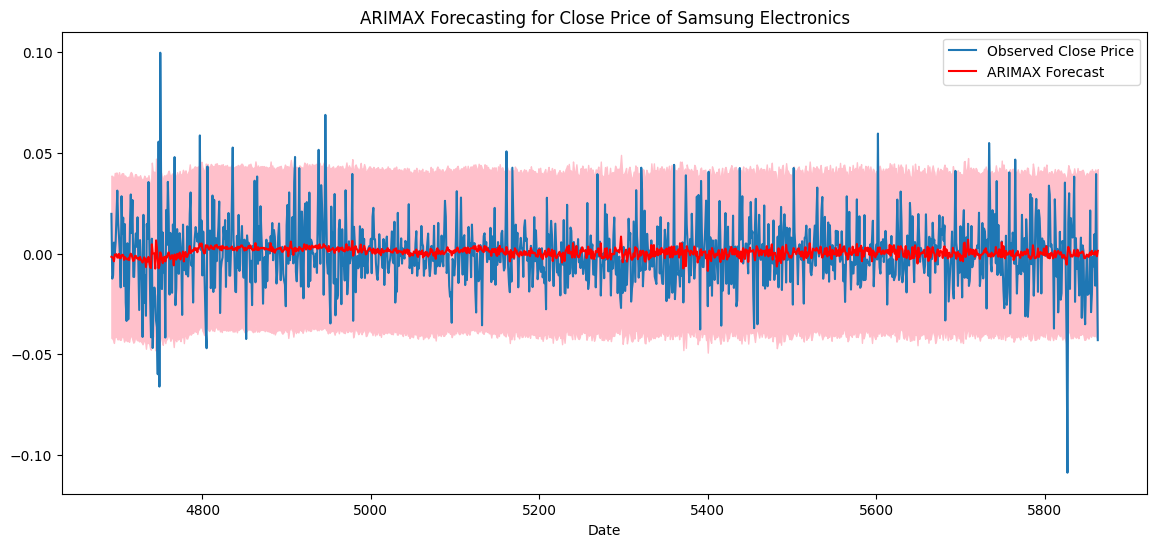

In [ ]:
diff_int_df = diff_int_df.reset_index(drop=True)
# Plot ARIMAX forecast
plt.figure(figsize=(14, 6))
plt.plot(diff_int_df['Close'][4692:], label='Observed Close Price')
plt.plot(arimax_forecast_mean, color='red', label='ARIMAX Forecast')
plt.fill_between(arimax_conf_int.index,
                 arimax_conf_int.iloc[:, 0],
                 arimax_conf_int.iloc[:, 1], color='pink')
plt.legend()
plt.title('ARIMAX Forecasting for Close Price of Samsung Electronics')
plt.xlabel('Date')
plt.show()

In [ ]:
def metrics(target, prediction):
  # Calculate RMSE
  rmse = np.sqrt(mean_squared_error(target, prediction))
  print('RMSE:', rmse)

  threshold = target.mean()

  # Convert to binary based on the threshold
  binary_test_same_df = (target > threshold).astype(int)
  binary_arimax_forecast_mean = (prediction > threshold).astype(int)

  # Calculate ROC curve and AUC-ROC
  fpr, tpr, thresholds = roc_curve(binary_test_same_df, binary_arimax_forecast_mean)
  roc_auc = auc(fpr, tpr)
  print('AUC-ROC:', roc_auc)

  # Plot the ROC curve
  plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

  # Calculate PR curve
  precision, recall, _ = precision_recall_curve(binary_test_same_df, binary_arimax_forecast_mean)
  pr_auc = auc(recall, precision)
  print('PR AUC:', pr_auc)

  # Plot the PR curve
  plt.plot(recall, precision, color='darkorange', label='PR curve (area = %0.2f)' % pr_auc)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend(loc="lower right")
  plt.show()

RMSE: 0.016411190425000173
AUC-ROC: 0.5153730553435839


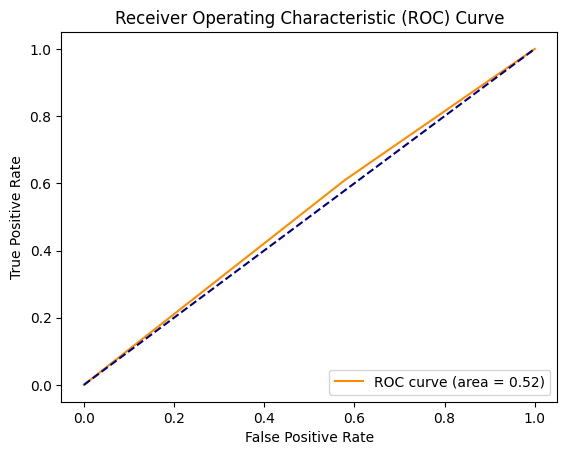

PR AUC: 0.6370580300172374


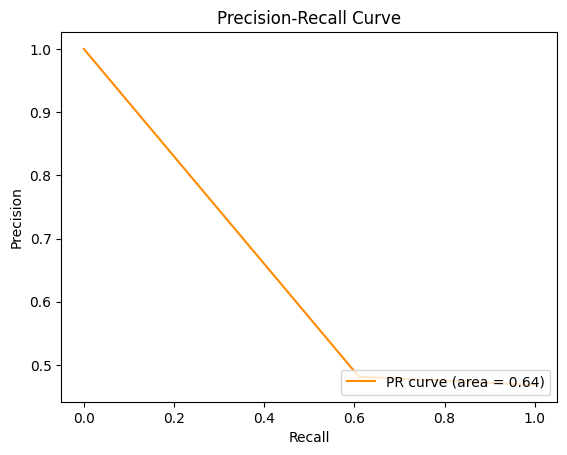

In [ ]:
metrics(test_same_df, arimax_forecast_mean)

# SARIMA(X)

In [ ]:
same_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5865 entries, 2001-01-02 to 2024-09-30
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5865 non-null   float64
 1   High                       5865 non-null   float64
 2   Low                        5865 non-null   float64
 3   Close                      5865 non-null   float64
 4   Volume                     5865 non-null   float64
 5   Change                     5865 non-null   float64
 6   Transaction                5865 non-null   float64
 7   SE_Operating_Profit        5865 non-null   float64
 8   SE_Net_Profit              5865 non-null   float64
 9   SE_Total_Equity            5865 non-null   float64
 10  SE_Total_Liabilities       5865 non-null   float64
 11  SE_Revenue                 5865 non-null   float64
 12  SE_Foreign                 5865 non-null   float64
 13  US_Inflation               586

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose each feature
for feature in same_df.columns:
    print(f"Decomposition for {feature}")
    result = seasonal_decompose(same_df[feature], model='additive', period=365)

    # Plot the decomposition
    result.plot()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Decompose each feature
for feature in int_df.columns:
    print(f"Decomposition for {feature}")
    result = seasonal_decompose(int_df[feature], model='additive', period=365)

    # Plot the decomposition
    result.plot()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

In [ ]:
train_same_df = diff_same_df['Close'].iloc[:4692]
#val_same_df = diff_same_df['Close'].iloc[3519:4692]
test_same_df = diff_same_df['Close'].iloc[4692:]

same_exog = diff_same_df[['SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Liabilities','SE_Revenue', 'US_GDP_Annual', 'US_Base' ,'US_10', 'KR_Unemployment']]
train_same_exog = same_exog.iloc[:4692]
#val_same_exog = same_exog.iloc[3519:4692]
test_same_exog = same_exog.iloc[4692:]

In [ ]:
# Define the p, d, q parameters for the regular ARIMA part
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

# Define the P, D, Q parameters for the seasonal part and try two seasonal periods
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
seasonal_periods = [365]

# DataFrame to store results
results = []
# Grid search over SARIMAX parameters with multiple seasonal periods
for param in pdq:
    for seasonal_m in seasonal_periods:
        seasonal_pdq = [(x[0], x[1], x[2], seasonal_m) for x in itertools.product(P, D, Q)]
        for seasonal_param in seasonal_pdq:
            try:
                # Fit SARIMAX model with exogenous variable(s) (e.g., exog=train_exog)
                temp_model = SARIMAX(val_same_df,
                                     order=param,
                                     seasonal_order=seasonal_param,
                                     exog=val_same_exog)
                temp_result = temp_model.fit(disp=False)  # disp=False suppresses output
                print(f"SARIMAX{param}x{seasonal_param} - AIC: {temp_result.aic}")

                # Store parameters and AIC
                results.append([param, seasonal_param, temp_result.aic])
            except Exception as e:
                continue

# Convert results to DataFrame and sort by AIC
results_df = pd.DataFrame(results, columns=['SARIMAX parameters', 'Seasonal parameters', 'AIC'])
results_df = results_df.sort_values(by='AIC').reset_index(drop=True)

print("Optimal SARIMAX parameters and AIC values:")
print(results_df)

SARIMAX(0, 0, 0)x(0, 0, 0, 365) - AIC: -6343.664327094739


KeyboardInterrupt: 

In [ ]:
# Define the SARIMAX parameters
order = (0, 0, 0)
seasonal_order = (0, 0, 0, 365)

# Fit the SARIMAX model with exogenous variables if available (e.g., exog=train_exog)
sarimax_model = SARIMAX(train_same_df, order=order, seasonal_order=seasonal_order, exog=train_same_exog)
sarimax_fit = sarimax_model.fit()

# Print the summary of the fitted model
print(sarimax_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4692
Model:                        SARIMAX   Log Likelihood               11538.653
Date:                Sun, 15 Dec 2024   AIC                         -23059.306
Time:                        12:37:28   BIC                         -23001.224
Sample:                             0   HQIC                        -23038.884
                               - 4692                                         
Covariance Type:                  opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
SE_Operating_Profit     -0.0005      0.001     -0.466      0.641      -0.003       0.002
SE_Net_Profit            0.0009      0.002      0.460      0.646      -0.003       0.005
SE_Total_Lia

In [ ]:
# Forecasting with SARIMAX
forecast_steps = len(test_same_df)
sarimax_forecast = sarimax_fit.get_forecast(steps=forecast_steps, exog=test_same_exog)
sarimax_forecast_mean = sarimax_forecast.predicted_mean
sarimax_conf_int = sarimax_forecast.conf_int()

RMSE: 0.01639049065833657
AUC-ROC: 0.5339403029585383


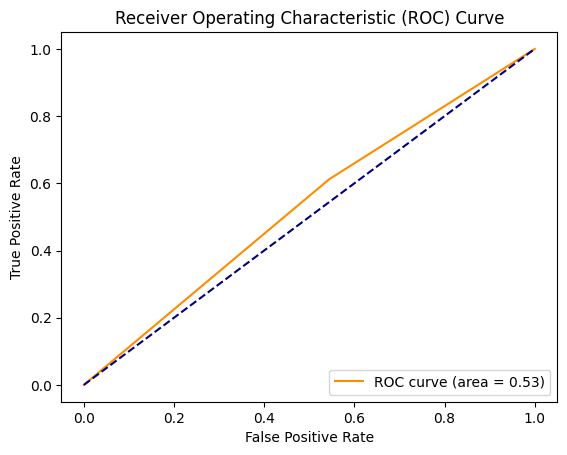

PR AUC: 0.645770125017873


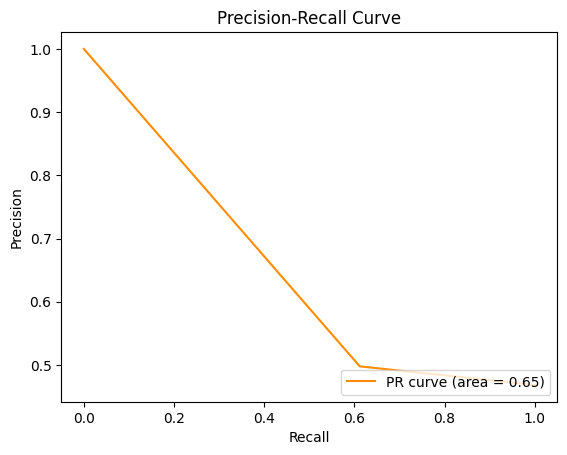

In [ ]:
metrics(test_same_df, sarimax_forecast_mean)

In [ ]:
diff_same_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5864 entries, 2001-01-03 to 2024-09-30
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       5864 non-null   float64
 1   High                       5864 non-null   float64
 2   Low                        5864 non-null   float64
 3   Close                      5864 non-null   float64
 4   Volume                     5864 non-null   float64
 5   Change                     5864 non-null   float64
 6   Transaction                5864 non-null   float64
 7   SE_Operating_Profit        5864 non-null   float64
 8   SE_Net_Profit              5864 non-null   float64
 9   SE_Total_Equity            5864 non-null   float64
 10  SE_Total_Liabilities       5864 non-null   float64
 11  SE_Revenue                 5864 non-null   float64
 12  SE_Foreign                 5864 non-null   float64
 13  US_Inflation               586

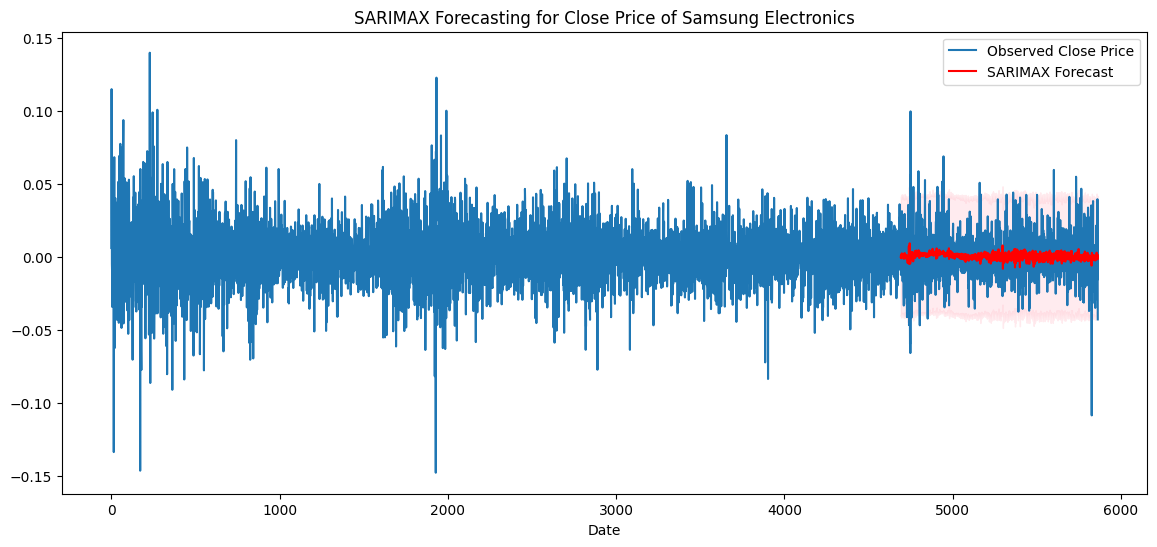

In [ ]:
# Plot SARIMAX forecast
diff_same_df = diff_same_df.reset_index(drop=True)
plt.figure(figsize=(14, 6))
plt.plot(diff_same_df['Close'], label='Observed Close Price')
plt.plot(sarimax_forecast_mean, color='red', label='SARIMAX Forecast')
plt.fill_between(sarimax_conf_int.index,
                 sarimax_conf_int.iloc[:, 0],
                 sarimax_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMAX Forecasting for Close Price of Samsung Electronics')
plt.xlabel('Date')
plt.show()

interpolated dataset

In [ ]:
train_int_df = diff_int_df['Close'].iloc[:4692]
test_int_df = diff_int_df['Close'].iloc[4692:]

int_exog = diff_int_df[['CN_Inflation', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_10', 'KR_Unemployment']]
train_int_exog = int_exog.iloc[:4692]
test_int_exog = int_exog.iloc[4692:]

In [ ]:
# Define the p, d, q parameters for the regular ARIMA part
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

# Define the P, D, Q parameters for the seasonal part and try two seasonal periods
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
seasonal_periods = [365]

# DataFrame to store results
results = []

# Grid search over SARIMAX parameters with multiple seasonal periods
for param in pdq:
    for seasonal_m in seasonal_periods:
        seasonal_pdq = [(x[0], x[1], x[2], seasonal_m) for x in itertools.product(P, D, Q)]
        for seasonal_param in seasonal_pdq:
            try:
                # Fit SARIMAX model with exogenous variable(s) (e.g., exog=train_exog)
                temp_model = SARIMAX(train_int_df,
                                     order=param,
                                     seasonal_order=seasonal_param,
                                     exog=train_int_exog)
                temp_result = temp_model.fit(disp=False)  # disp=False suppresses output
                print(f"SARIMAX{param}x{seasonal_param} - AIC: {temp_result.aic}")

                # Store parameters and AIC
                results.append([param, seasonal_param, temp_result.aic])
            except Exception as e:
                continue

# Convert results to DataFrame and sort by AIC
results_df = pd.DataFrame(results, columns=['SARIMAX parameters', 'Seasonal parameters', 'AIC'])
results_df = results_df.sort_values(by='AIC').reset_index(drop=True)

print("Optimal SARIMAX parameters and AIC values:")
print(results_df)

SARIMAX(0, 0, 0)x(0, 0, 0, 365) - AIC: -23068.072274653743


In [ ]:
# Define the SARIMAX parameters
order = (0,0,0)
seasonal_order = (0, 0, 0, 365)

# Fit the SARIMAX model with exogenous variables if available (e.g., exog=train_exog)
sarimax_model = SARIMAX(train_int_df, order=order, seasonal_order=seasonal_order, exog=train_int_exog)
sarimax_fit = sarimax_model.fit()

# Print the summary of the fitted model
print(sarimax_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4692
Model:                        SARIMAX   Log Likelihood               11540.036
Date:                Sun, 15 Dec 2024   AIC                         -23068.072
Time:                        12:40:01   BIC                         -23029.351
Sample:                             0   HQIC                        -23054.457
                               - 4692                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
CN_Inflation               -0.0232      0.012     -1.994      0.046      -0.046      -0.000
US_Economic_Growth_Rate     0.0004      0.000      1.260      0.208      -0.000       0.001


In [ ]:
# Forecasting with SARIMAX
forecast_steps = len(test_int_df)
sarimax_forecast = sarimax_fit.get_forecast(steps=forecast_steps, exog=test_int_exog)
sarimax_forecast_mean = sarimax_forecast.predicted_mean
sarimax_conf_int = sarimax_forecast.conf_int()

RMSE: 0.016400626763807335
AUC-ROC: 0.514852628593649


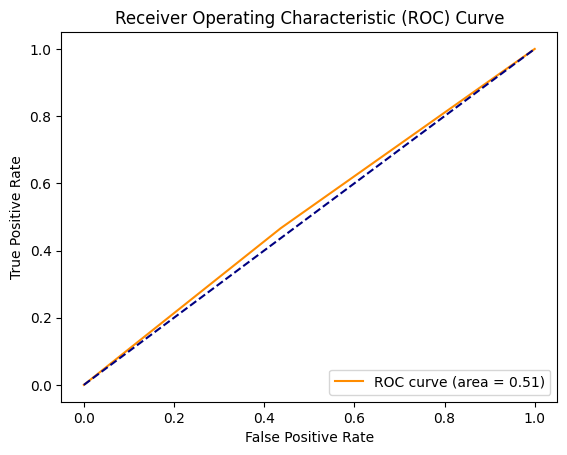

PR AUC: 0.6005754263950984


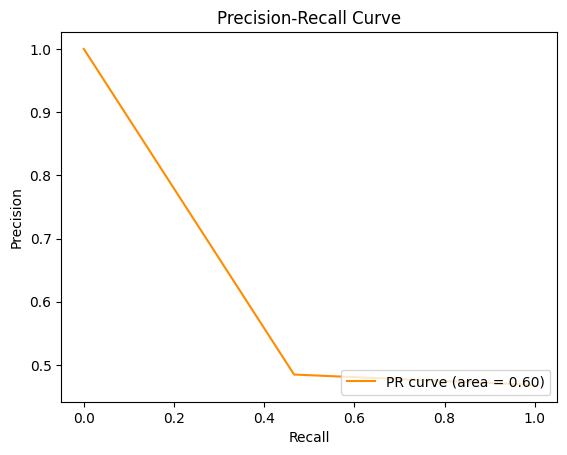

In [ ]:
metrics(test_int_df, sarimax_forecast_mean)

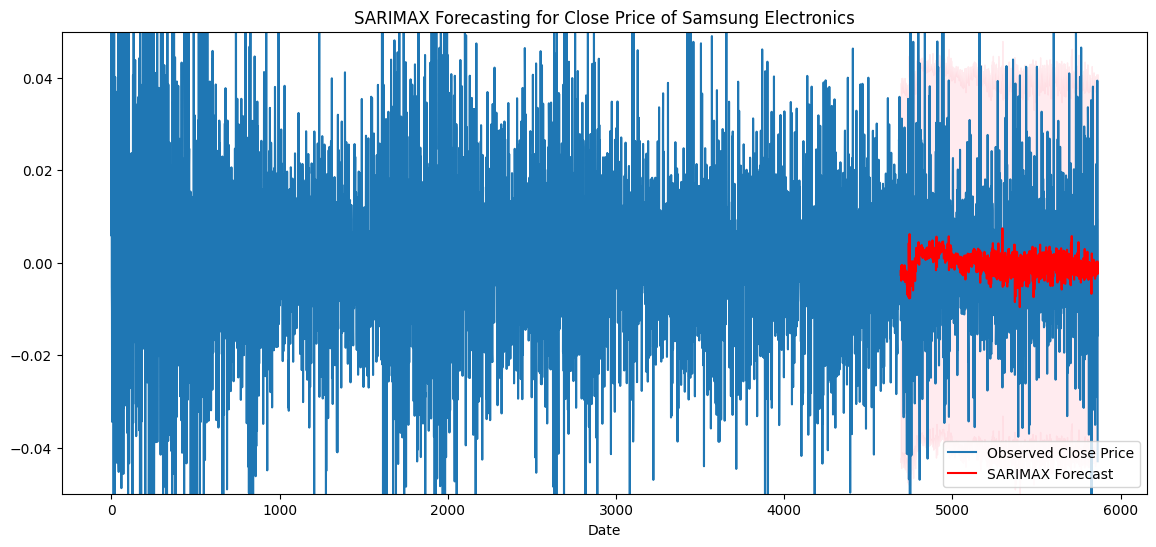

In [ ]:
# Plot SARIMAX forecast
diff_int_df = diff_int_df.reset_index(drop=True)
plt.figure(figsize=(14, 6))
plt.ylim(-0.05, 0.05)
plt.plot(diff_int_df['Close'], label='Observed Close Price')
plt.plot(sarimax_forecast_mean, color='red', label='SARIMAX Forecast')
plt.fill_between(sarimax_conf_int.index,
                 sarimax_conf_int.iloc[:, 0],
                 sarimax_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('SARIMAX Forecasting for Close Price of Samsung Electronics')
plt.xlabel('Date')
plt.show()